In [1]:
%gui qt

from core.jupyter.setup_form import get_setup_form
from core.configuration.configuration_agregator import ConfigurationAggregator

conf = ConfigurationAggregator()
get_setup_form(conf)

Box(children=(Box(children=(Label(value='Iterations'), interactive(children=(IntSlider(value=100, continuous_u…

Iteration: 475/491


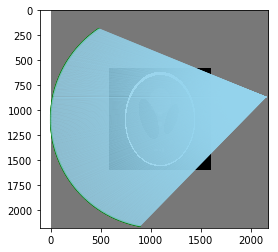

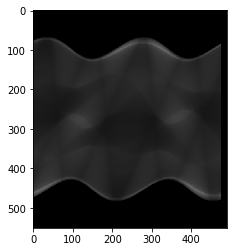

Filter
Normalization


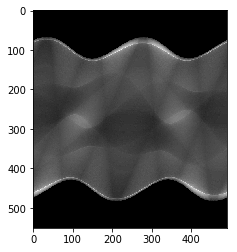

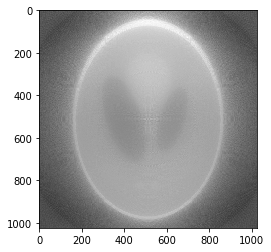

MSE: 82.58


In [3]:
from PIL import Image
from core.sinogram import Sinogram
from core.image_processor import ImageProcessor

image = Image.open(conf.image_path).convert('L')

sinogram = Sinogram(conf)
for _ in sinogram.create_sinogram_from_image(image):
    pass

image2 = sinogram.sinogram_to_image()


print('MSE: {0:0.2f}'.format(ImageProcessor.calculate_medium_squared_error(image2, sinogram.image)))




In [4]:
from core.jupyter.dicom_form import get_dicom_form
get_dicom_form(conf)

ModuleNotFoundError: No module named 'pydicom'